# Import NewDataset class

In [ ]:
from main import NewDataset

# Load Datasets, Preprocess

In [39]:
def split_dialogue(dataset):

  def preprocess(item) -> str:
    # replace persona 1 name one to be main character
    d = item['dialogue'].split("#Person")
    d = [t for t in d if len(t) > 0]
    d = [{'content': "".join(text.split(':')[1:]), 'role': 'user' if ('1#' in text) else 'assistant'} for text in d]

    l = len(d)
    return {'d': d, 'l': l}

  return dataset.map(preprocess)

def dialogue_length(dataset):
  from datasets import DatasetDict

  dataset = DatasetDict({
      'train': dataset['train'],
      'validation': dataset['valid'],
      'test': dataset['test'],
  })

  return dataset.map(lambda i: {'d': i['conversations'], 'l': len(i['conversations'])})

dataset_params = {
    "knkarthick/dialogsum": ("d", "l"),
    "Estwld/empathetic_dialogues_llm": ("d", "l")
}

dataset_preprocesses = {
    'knkarthick/dialogsum': split_dialogue,
    "Estwld/empathetic_dialogues_llm": dialogue_length,
}

dataset = NewDataset(dataset_params,
                     dataset_preprocesses=dataset_preprocesses,
                     target_col_name = 'l',
                     input_col_name = 'd')
print(dataset)

knkarthick/dialogsum have a custom fn
Estwld/empathetic_dialogues_llm have a custom fn
{'train': Dataset({
    features: ['d', 'l'],
    num_rows: 31993
}), 'validation': Dataset({
    features: ['d', 'l'],
    num_rows: 3270
}), 'test': Dataset({
    features: ['d', 'l'],
    num_rows: 4047
})}


# Analizing Datasets

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(dataset.dict_dataset['train'])

In [45]:
df.l.describe()

count    31993.000000
mean         6.328478
std          3.664374
min          1.000000
25%          4.000000
50%          4.000000
75%          8.000000
max         61.000000
Name: l, dtype: float64

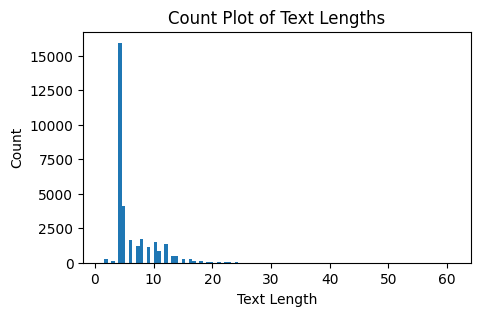

In [47]:
# Create a count plot based on the length of text data
plt.figure(figsize=(5, 3))  # Set the figure size
plt.title('Count Plot of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.hist(df.l, bins=100)  # Adjust the number of bins as needed
plt.show()